In [1]:
# Khai báo thư viện cần dùng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,35.352649,8.128536,12.816737,9.484312,16.751940
1,56.675052,8.396720,9.711184,0.751212,20.532905
2,42.113342,37.517738,12.015424,0.504156,22.069654
3,45.744748,9.321953,8.499100,-14.742047,17.829505
4,46.905833,0.294035,10.052759,10.349258,20.027065


<AxesSubplot:ylabel='Density'>

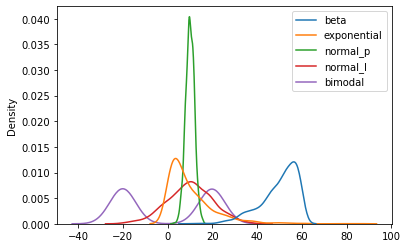

In [5]:
# Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [6]:
# Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.953191,10.152734,10.025760,10.001710,-0.111273
std,8.301985,10.388695,1.953529,10.042450,20.152629
min,11.272729,0.029313,2.937829,-20.171451,-27.448377
25%,45.720154,2.991374,8.726534,3.647498,-20.045500
50%,52.068196,6.778833,10.008051,10.162264,-0.157051
75%,56.462887,14.025380,11.358957,17.038203,19.759312
max,59.992913,85.555558,15.904910,39.157668,28.523670


<AxesSubplot:ylabel='Density'>

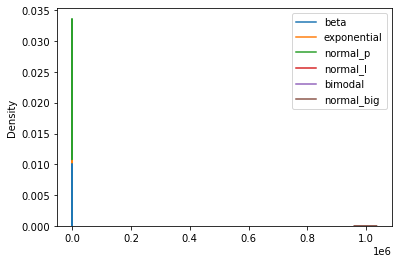

In [7]:
# Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

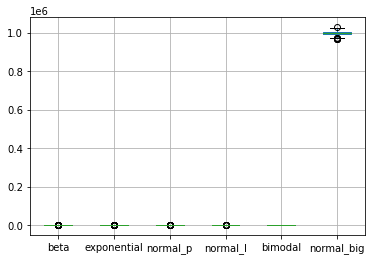

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Chuẩn hóa với Min-Max scaling
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)
# lấy danh sáchc cột
col_names = list(df.columns)
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.494249,0.094699,0.761845,0.499852,0.789686,0.531161
1,0.931900,0.097834,0.522350,0.352654,0.857237,0.616942
2,0.633015,0.438327,0.700049,0.348490,0.884692,0.345498
3,0.707551,0.108652,0.428876,0.091513,0.808937,0.745678
4,0.731383,0.003095,0.548692,0.514431,0.848199,0.633131


<AxesSubplot:ylabel='Density'>

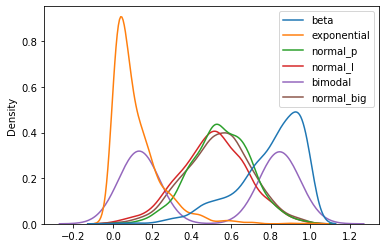

In [11]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

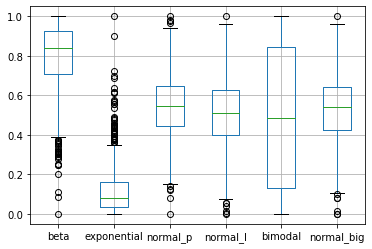

In [12]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.793931,0.118366,0.546610,0.508573,0.488406,0.534503
std,0.170401,0.121468,0.150653,0.169267,0.360048,0.165306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.707046,0.034633,0.446415,0.401471,0.132260,0.425230
50%,0.837342,0.078918,0.545244,0.511279,0.487588,0.540961
75%,0.927545,0.163646,0.649424,0.627174,0.843415,0.640316
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [15]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [16]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[11.27272902783421,
 0.0293126923737215,
 2.9378294734322816,
 -20.17145142874967,
 -27.448377187393305,
 967447.6341169226]

In [17]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [18]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.9929132972487,
 85.55555810659526,
 15.90490998374107,
 39.1576684031173,
 28.52366967023399,
 1028108.2130412483]

In [19]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0000000000000002, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0]